In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
import pandas as pd

df = pd.read_csv("Texas_Food_Acessibility - Sheet1.csv")
df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,48001950100,Texas,Anderson County,0,4685,1874,0,49,1.05,0,...,912,4012,452,22,0,13,186,236,46,165
1,48001950401,Texas,Anderson County,0,5422,77,1,5219,96.26,0,...,24,1825,2266,21,0,5,1305,1324,0,0
2,48001950402,Texas,Anderson County,0,7535,83,1,7315,97.08,1,...,134,2591,3248,13,0,10,1673,1737,0,12
3,48001950500,Texas,Anderson County,1,4377,1604,0,86,1.96,1,...,627,2737,800,19,2,20,799,1389,130,310
4,48001950600,Texas,Anderson County,1,6405,2253,0,96,1.50,1,...,791,3831,1674,68,4,43,785,1253,230,289


In [5]:
%%R
 
# Import data with R
df <- read_csv('Texas_Food_Acessibility - Sheet1.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 147
  CensusTract State County      Urban Pop2010 OHU2010 GroupQuartersFlag NUMGQTRS
        <dbl> <chr> <chr>       <dbl>   <dbl>   <dbl>             <dbl>    <dbl>
1 48001950100 Texas Anderson C…     0    4685    1874                 0       49
2 48001950401 Texas Anderson C…     0    5422      77                 1     5219
3 48001950402 Texas Anderson C…     0    7535      83                 1     7315
4 48001950500 Texas Anderson C…     1    4377    1604                 0       86
# ℹ 139 more variables: PCTGQTRS <dbl>, LILATracts_1And10 <dbl>,
#   LILATracts_halfAnd10 <dbl>, LILATracts_1And20 <dbl>,
#   LILATracts_Vehicle <dbl>, HUNVFlag <dbl>, LowIncomeTracts <dbl>,
#   PovertyRate <dbl>, MedianFamilyIncome <chr>, LA1and10 <dbl>,
#   LAhalfand10 <dbl>, LA1and20 <dbl>, LATracts_half <dbl>, LATracts1 <dbl>,
#   LATracts10 <dbl>, LATracts20 <dbl>, LATractsVehicle_20 <dbl>,
#   LAPOP1_10 <chr>, LAPOP05_10 <chr>, LAPOP1_20 <chr>, LALOWI1_10 <chr>, …
# ℹ Use `colnames()

In [6]:
%%R 

df_summary <- df %>%
    group_by(Urban) %>%
    summarise(Total_Offenses = n())
df_summary

# A tibble: 2 × 2
  Urban Total_Offenses
  <dbl>          <int>
1     0           1142
2     1           4096


In [7]:
%%R

model <- lm(TractHUNV ~ Urban, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ Urban, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-108.98  -64.98  -24.98   35.02  867.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   58.145      2.859   20.33   <2e-16 ***
Urban         50.832      3.234   15.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.63 on 5236 degrees of freedom
Multiple R-squared:  0.04507,	Adjusted R-squared:  0.04489 
F-statistic: 247.1 on 1 and 5236 DF,  p-value: < 2.2e-16



In [8]:
%%R

model <- lm(TractSNAP ~ Urban, data = df)
summary(model)


Call:
lm(formula = TractSNAP ~ Urban, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-235.77 -140.77  -41.77   93.23 1652.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  176.884      5.711  30.971   <2e-16 ***
Urban         58.888      6.459   9.118   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 193 on 5236 degrees of freedom
Multiple R-squared:  0.01563,	Adjusted R-squared:  0.01544 
F-statistic: 83.13 on 1 and 5236 DF,  p-value: < 2.2e-16



In [9]:
%%R

model <- lm(LILATracts_1And10 ~ Urban, data = df)
summary(model)


Call:
lm(formula = LILATracts_1And10 ~ Urban, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22437 -0.22437 -0.22437 -0.09019  0.90981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.09019    0.01161   7.766 9.68e-15 ***
Urban        0.13417    0.01313  10.216  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3925 on 5236 degrees of freedom
Multiple R-squared:  0.01954,	Adjusted R-squared:  0.01936 
F-statistic: 104.4 on 1 and 5236 DF,  p-value: < 2.2e-16



In [10]:
%%R

model <- lm(TractHUNV ~ lakidshalf, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ lakidshalf, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-306.0  -41.0    0.0   23.5  549.2 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     87.70370   18.58489   4.719 2.47e-06 ***
lakidshalf1     71.65993   34.54264   2.075 0.038111 *  
lakidshalf10    55.54630   51.73815   1.074 0.283083    
lakidshalf100  117.96296   58.77059   2.007 0.044817 *  
lakidshalf1000  -8.03704   58.77059  -0.137 0.891235    
lakidshalf1001 -18.20370   51.73815  -0.352 0.724980    
lakidshalf1003 -14.20370   51.73815  -0.275 0.783695    
lakidshalf1004  29.29630   70.76916   0.414 0.678925    
lakidshalf1005 106.79630   51.73815   2.064 0.039084 *  
lakidshalf1006   3.62963   58.77059   0.062 0.950758    
lakidshalf1007 -46.70370   70.76916  -0.660 0.509338    
lakidshalf1008 -67.70370   70.76916  -0.957 0.338801    
lakidshalf1009 100.79630   70.76916   1.424 0.154460    
lakidshalf101   -5.20370   70.76916  -0.074 0.94

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



    
lakidshalf237  -43.70370   70.76916  -0.618 0.536915    
lakidshalf2378 -67.70370   98.34201  -0.688 0.491219    
lakidshalf238   28.29630   47.01647   0.602 0.547326    
lakidshalf2381  72.29630   98.34201   0.735 0.462302    
lakidshalf2384 -36.70370   98.34201  -0.373 0.709006    
lakidshalf2387 -37.70370   98.34201  -0.383 0.701454    
lakidshalf2388   5.29630   98.34201   0.054 0.957053    
lakidshalf239   12.62963   58.77059   0.215 0.829862    
lakidshalf2393  36.29630   98.34201   0.369 0.712091    
lakidshalf2397 -21.70370   98.34201  -0.221 0.825343    
lakidshalf24   111.96296   58.77059   1.905 0.056860 .  
lakidshalf240   16.29630   98.34201   0.166 0.868396    
lakidshalf2407  -0.70370   98.34201  -0.007 0.994291    
lakidshalf2409 103.29630   98.34201   1.050 0.293625    
lakidshalf241  -58.70370   98.34201  -0.597 0.550594    
lakidshalf2412  -6.20370   70.76916  -0.088 0.930152    
lakidshalf2413  -8.70370   98.34201  -0.089 0.929481    
lakidshalf2414  12.62963  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
%%R

model <- lm(TractHUNV ~ LILATracts_1And10, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ LILATracts_1And10, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-129.28  -66.29  -29.29   33.71  885.71 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         90.287      1.504   60.02   <2e-16 ***
LILATracts_1And10   38.988      3.405   11.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 97.67 on 5236 degrees of freedom
Multiple R-squared:  0.02442,	Adjusted R-squared:  0.02424 
F-statistic: 131.1 on 1 and 5236 DF,  p-value: < 2.2e-16



In [12]:
%%R

model <- lm(PovertyRate ~ TractHUNV, data = df)
summary(model)


Call:
lm(formula = PovertyRate ~ TractHUNV, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.211  -7.620  -2.251   5.523  88.817 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.182721   0.210711   53.07   <2e-16 ***
TractHUNV    0.056689   0.001514   37.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.84 on 5236 degrees of freedom
Multiple R-squared:  0.2111,	Adjusted R-squared:  0.211 
F-statistic:  1401 on 1 and 5236 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


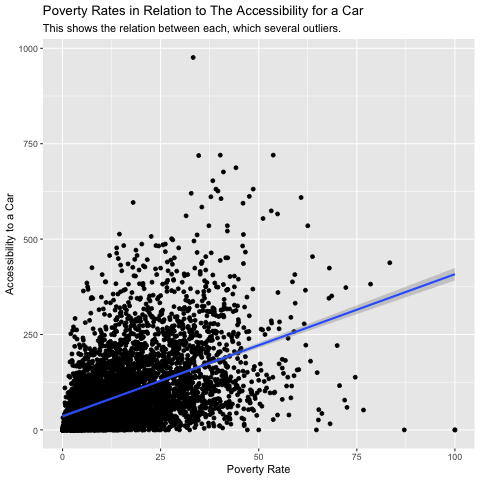

In [24]:
%%R 

ggplot(df) + 
	aes(x = PovertyRate, y = TractHUNV) + 
	geom_point() +
	geom_smooth(method='lm') +
    labs(title = "Poverty Rates in Relation to The Accessibility for a Car", subtitle = "This shows the relation between each, which several outliers.", x = "Poverty Rate",y = "Accessibility to a Car") 

In [14]:
%%R

model <- lm(TractSNAP ~ TractHUNV, data = df)
summary(model)


Call:
lm(formula = TractSNAP ~ TractHUNV, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-571.13  -97.69  -26.50   71.97 1475.46 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 110.94611    3.07726   36.05   <2e-16 ***
TractHUNV     1.14396    0.02212   51.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 158.3 on 5236 degrees of freedom
Multiple R-squared:  0.3381,	Adjusted R-squared:  0.338 
F-statistic:  2675 on 1 and 5236 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


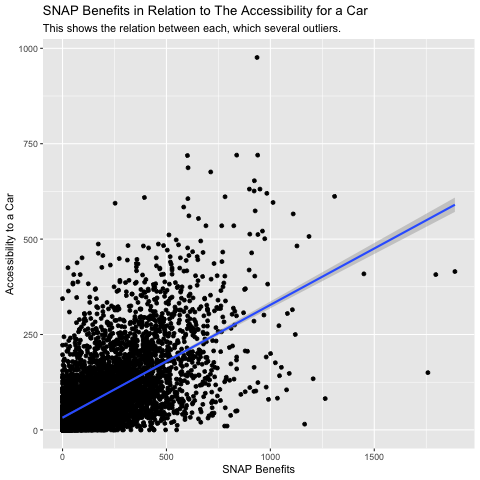

In [25]:
%%R 

ggplot(df) + 
	aes(x = TractSNAP, y = TractHUNV) + 
	geom_point() +
	geom_smooth(method='lm') +
    labs(title = "SNAP Benefits in Relation to The Accessibility for a Car", subtitle = "This shows the relation between each, which several outliers.", x = "SNAP Benefits",y = "Accessibility to a Car") 

`geom_smooth()` using formula = 'y ~ x'


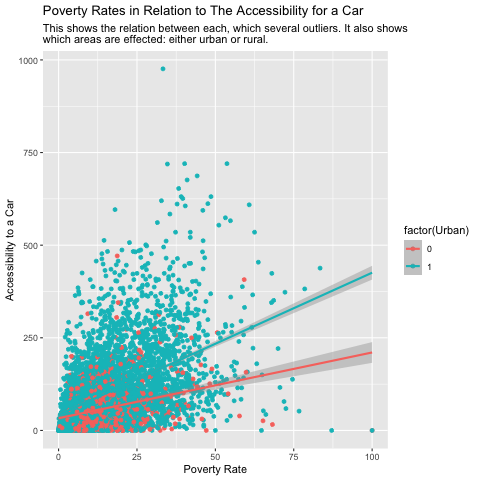

In [27]:
%%R 

ggplot(df) + 
	aes(x = PovertyRate, y = TractHUNV, color = factor(Urban)) + 
	geom_point() +
	geom_smooth(method='lm') +
    labs(title = "Poverty Rates in Relation to The Accessibility for a Car", subtitle = "This shows the relation between each, which several outliers. It also shows \nwhich areas are effected: either urban or rural.", x = "Poverty Rate",y = "Accessibility to a Car") 

In [17]:

%%R
model <- lm(TractHUNV ~ LAhalfand10 + PovertyRate + TractSeniors, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ LAhalfand10 + PovertyRate + TractSeniors, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-400.23  -49.74  -17.01   29.11  823.32 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -21.117479   3.748129  -5.634 1.85e-08 ***
LAhalfand10   20.226530   2.839117   7.124 1.19e-12 ***
PovertyRate    4.009060   0.097281  41.211  < 2e-16 ***
TractSeniors   0.072697   0.003941  18.446  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 84.79 on 5234 degrees of freedom
Multiple R-squared:  0.2651,	Adjusted R-squared:  0.2647 
F-statistic: 629.3 on 3 and 5234 DF,  p-value: < 2.2e-16



In [18]:
%%R
model <- lm(TractHUNV ~ LA1and10 + PovertyRate + TractSeniors, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ LA1and10 + PovertyRate + TractSeniors, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-388.62  -49.76  -16.71   28.95  824.43 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.291532   3.151498  -0.410 0.681958    
LA1and10     -8.583846   2.381784  -3.604 0.000316 ***
PovertyRate   3.982774   0.097858  40.699  < 2e-16 ***
TractSeniors  0.073298   0.003971  18.458  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 85.09 on 5234 degrees of freedom
Multiple R-squared:  0.2598,	Adjusted R-squared:  0.2594 
F-statistic: 612.3 on 3 and 5234 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


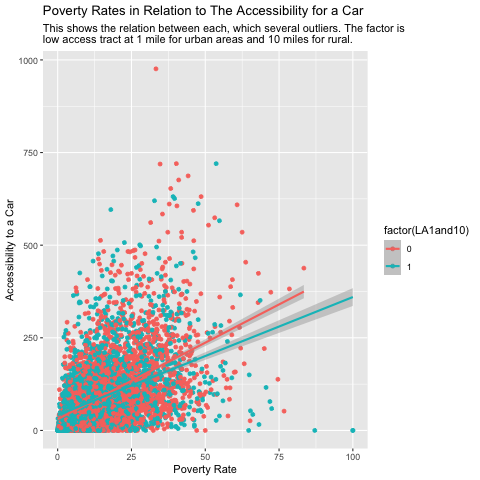

In [29]:
%%R 

ggplot(df) + 
	aes(x = PovertyRate, y = TractHUNV, color = factor(LA1and10)) + 
	geom_point() +
	geom_smooth(method='lm') +
    labs(title = "Poverty Rates in Relation to The Accessibility for a Car", subtitle = "This shows the relation between each, which several outliers. The factor is \nlow access tract at 1 mile for urban areas and 10 miles for rural.", x = "Poverty Rate",y = "Accessibility to a Car") 

In [20]:
%%R
model <- lm(TractHUNV ~ Urban + PovertyRate + TractSeniors, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ Urban + PovertyRate + TractSeniors, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-389.73  -47.54  -14.71   29.43  821.64 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -46.338756   3.765931  -12.30   <2e-16 ***
Urban         48.994150   2.826706   17.33   <2e-16 ***
PovertyRate    3.868293   0.095397   40.55   <2e-16 ***
TractSeniors   0.082934   0.003901   21.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 82.85 on 5234 degrees of freedom
Multiple R-squared:  0.2982,	Adjusted R-squared:  0.2978 
F-statistic: 741.5 on 3 and 5234 DF,  p-value: < 2.2e-16



In [21]:
%%R
df$PctBlack <- df$TractBlack / df$Pop2010
df$PctWhite <- df$TractWhite / df$Pop2010
df$PctHispanic <- df$TractHispanic / df$Pop2010

model <- lm(TractHUNV ~ PctBlack + PctWhite + PctHispanic + Urban, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ PctBlack + PctWhite + PctHispanic + 
    Urban, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-230.31  -56.39  -19.83   34.29  754.77 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   49.913     13.675   3.650 0.000265 ***
PctBlack     162.829     17.251   9.439  < 2e-16 ***
PctWhite     -28.461     14.284  -1.993 0.046361 *  
PctHispanic   81.099      5.101  15.898  < 2e-16 ***
Urban         23.628      3.267   7.232 5.45e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 90.24 on 5233 degrees of freedom
Multiple R-squared:  0.1676,	Adjusted R-squared:  0.167 
F-statistic: 263.5 on 4 and 5233 DF,  p-value: < 2.2e-16



In [22]:
%%R
df$PctBlack <- df$TractBlack / df$Pop2010
df$PctWhite <- df$TractWhite / df$Pop2010
df$PctHispanic <- df$TractHispanic / df$Pop2010

model <- lm(TractHUNV ~ PctBlack + PctWhite + PctHispanic + TractSNAP, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ PctBlack + PctWhite + PctHispanic + 
    TractSNAP, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-362.09  -42.61  -14.77   27.04  617.83 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.199e+02  1.108e+01  10.822  < 2e-16 ***
PctBlack    -2.849e+01  1.549e+01  -1.839    0.066 .  
PctWhite    -1.016e+02  1.210e+01  -8.398  < 2e-16 ***
PctHispanic -3.112e+01  5.216e+00  -5.966 2.59e-09 ***
TractSNAP    2.904e-01  6.948e-03  41.805  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.52 on 5233 degrees of freedom
Multiple R-squared:  0.3698,	Adjusted R-squared:  0.3693 
F-statistic: 767.6 on 4 and 5233 DF,  p-value: < 2.2e-16



In [23]:
%%R
df$PctBlack <- df$TractBlack / df$Pop2010
df$PctWhite <- df$TractWhite / df$Pop2010
df$PctHispanic <- df$TractHispanic / df$Pop2010

model <- lm(TractHUNV ~ PctBlack + PctWhite + PctHispanic + TractSNAP, data = df)
summary(model)


Call:
lm(formula = TractHUNV ~ PctBlack + PctWhite + PctHispanic + 
    TractSNAP, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-362.09  -42.61  -14.77   27.04  617.83 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.199e+02  1.108e+01  10.822  < 2e-16 ***
PctBlack    -2.849e+01  1.549e+01  -1.839    0.066 .  
PctWhite    -1.016e+02  1.210e+01  -8.398  < 2e-16 ***
PctHispanic -3.112e+01  5.216e+00  -5.966 2.59e-09 ***
TractSNAP    2.904e-01  6.948e-03  41.805  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.52 on 5233 degrees of freedom
Multiple R-squared:  0.3698,	Adjusted R-squared:  0.3693 
F-statistic: 767.6 on 4 and 5233 DF,  p-value: < 2.2e-16

